<h1 style="color:#f56c42;">
Title: Fairness in Healthcare - Addressing Demographic Bias in ICU Mortality ML Prediction Models

# Business Context

ICU - Intensive Care Unit is an important and integrated part of hospitals and modern healthcare systems, where serious health issues are treated. This is a critical and resource-intensive environment. Clinicians and Practitioners have to make continuous, quick, and accurate decisions to save lives. Doctors are increasingly relying on ML solutions for making better decisions and in risk stratification, as well as treatment prioritization. 

One common application of machine learning is to predict the likelihood of in-hospital mortality (death) of a patient during ICU treatments. These predictions will assist in overall patient management,  allocation of resources, and staffing. Hence, these predictions must be accurate and fair. If the predictions are unfair and discriminate against a certain non-protected group, like women, the elderly. Some times model predictions can be unfair without any intent or using any sensitive attributes, this can happen due to the bias in historical data of training that reflect unfairness

Therefore, It is necessary to address the unfairness and deploy fair models to follow regulatory standards and frameworks.

**Problem Statement:** The main objective of this project is to address and check if there is any demographic bias in the ICU mortality prediction model. I will be employing the MIMIC-III dataset, which is available on Kaggel and is a real data from of ICU patients.

**Type of Machine Learnig Task:** This task is subjected to supervised machine learning particularly binary cllassification problem, where the model goal is to predict whether a patient admitted to ICU survies or not.

**Addressing this problem will:**
- Improves patient outcomes and risk assesments
- Improves equitable health tratment
- Mitigates violations of legal and ethical concerns related to discrimination
- Strengthens model failure rates and genarelize the model better with diverse patient information


**Ethical Concerns related to this machine learning task**

- *Bias in the Data:* The dataset may reflect systemic and historical biases like diffrences in care across gender,insurance type and ethnicity
- *Unfair Treatment Risk*: If the model underestimate for certain demographics like young, elderly people, these group of patients will get delayed care risk
- *Decision making*: There is no transparancy and accountablity of the decision made, make doctors to not to trust and relay on such model
- Poor generalization
- Regulatory and legal risk
- Voilation of medical ethics

# Dataset Overview and File Selection

**Dataset URL:** https://www.kaggle.com/datasets/bilal1907/mimic-iii-10k/data

The dataset is used here is available on **Kaggle** and orginally from **MIMIC-III Clinical Database**. The complete dataset contains 28 files of diffrent types of health information of real ICU patients from USA hospitals.

This project uses only three main critical file to keep focused and scope of the problem.

- **PATIENTS_random.csv** - contains basic patient information
- **ADMISIONS_random.csv** - contains information related to patient addmission and discharge. and also our target variable
- **ICUSTAYS_random.csv** - contains information specific to ICU.

These three files have enough information to cover the scope of the project like age, gender, ethnicity ect. For future work, inclusion of othe files will make the model completed advanced and robust.

<h1 style="color:blue;"> Importing required libraries 

In this section, I will import main python libraries that used in this project

In [1]:
import pandas as pnd            # Main core libraries
import numpy as npy


import matplotlib.pyplot as mplt  # Visualization libraries
import seaborn as sea

from sklearn.model_selection import train_test_split      # For Spliting dataset 

from sklearn.preprocessing import StandardScaler          # For Standardising the Numerical Values
from sklearn.preprocessing import LabelEncoder            # For Converting Categorical Variables in to Numerical Values

from imblearn.over_sampling import SMOTE                  # For SMOTE Technique

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#Imports for Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score

import warnings                       # For ignoring warnings messages
warnings.filterwarnings("ignore")

import os           # For Interacting with Operating System such as to create and acess folders etc



<h1 style="color:blue;"> Loading the data into working environment

I will create a function that loads csv file and then i will call it on all 3 files

In [2]:
def loading_the_csv_dataset(filepath):
    """
    This function loads the csv data
    """
    try:
        df = pnd.read_csv(filepath, encoding='utf-8', delimiter=',')
        print("\n")
        print(f"File loaded successfully from --> {filepath} \nShape:", df.shape)
        df.columns = df.columns.str.lower()
        head = df.head(2)
        display(head)
        return df
    except FileNotFoundError:
        print(f"File not found. Please make sure ---- '{filepath}' ---- exists.")
        return None
    except pnd.errors.ParserError:
        print(f"Failed to parse '{filepath}'. Please check the file format.")
        return None

In [3]:
file_name = ['PATIENTS.csv', 'ADMISSIONS.csv', 'ICUSTAYS.csv']
df_ = {}
for name in file_name:                                           #Looping through all files to load
    key = name.replace('.csv', '').lower().replace(' ', '_')
    file_path = os.path.join('dataset_files', name)
    df_[key] = loading_the_csv_dataset(file_path)



File loaded successfully from --> dataset_files\PATIENTS.csv 
Shape: (10000, 8)


,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,1,2,M,2138-07-17 00:00:00,NaN,NaN,NaN,0
1,2,3,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1




File loaded successfully from --> dataset_files\ADMISSIONS.csv 
Shape: (12911, 19)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1




File loaded successfully from --> dataset_files\ICUSTAYS.csv 
Shape: (13436, 12)


,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,1,2,163353,243653,carevue,NICU,NICU,56,56,2138-07-17 21:20:07,2138-07-17 23:32:21,0.0918
1,2,3,145834,211552,carevue,MICU,MICU,12,12,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646


<h1 style="color:blue;"> Sanity check before merging the multiple dataset 

- I observerd, that the shape of each file is different when loading the data. This diffrent shape of all three files forced me for the  **Sanity checking**. 
- I also noticed that the columns *subject_id* is common in all three files, and *hadm_id* is common in ADMISSIONS.csv and ICUSTAYS.csv files.

Therefore i will be checking any missing values, duplicate values in those columns, other key columns and our target variable *hospital_expire_flag*

In [4]:
def checking_missing_values_in_columns(dataset, column_name):
    """
    This function print the missing values in the particular column.
    """
    if column_name not in dataset.columns:
        print(f" '{column_name}' is not present in {dataset}.")
        return
    count = dataset[column_name].isnull().sum()
    print(f"\n Missing values in '{column_name}': {count}")

In [5]:
def value_count_in_columns(dataset, column_name):
    """
    This function print the values count in the particular column
    """
    if column_name not in dataset.columns:
        print(f" '{column_name}' is not present in {dataset}.")
        return
    print(f"\n Value counts in '{column_name}' ")
    value_counts = dataset[column_name].value_counts(dropna=False)
    print(f"\n '{value_counts}'")

In [6]:
def checking_unique_values_in_columns(dataset, column_name):
    """
     This function print the number of unique values in a specified column.
    """
    if column_name not in dataset.columns:
        print(f" '{column_name}' is not present in {dataset}.")
        return
    count = dataset[column_name].nunique(dropna=False)
    print(f"\n Unique values in '{column_name}': {count}")

In [7]:
def checking_duplicate_values_in_columns(dataset, column_name):
    """
   This function print the number of duplicate values in a specified column.
    """
    if column_name not in dataset.columns:
        print(f" '{column_name}' is not present in {dataset}.")
        return
    count = dataset.duplicated(subset=[column_name]).sum()
    print(f"\n Duplicate values in '{column_name}': {count}")

In [8]:
columns_to_check = {
                    "patients":   ["subject_id", "gender", "dob"],
                    "admissions": ["subject_id", "hadm_id", "admittime", "hospital_expire_flag"],
                    "icustays":   ["subject_id", "hadm_id", "icustay_id"]
}

In [9]:
for dataset_name, columns in columns_to_check.items():        # Looping through each dataset to perfom sanity check
    print(f"\n \n \n --> Dataset: {dataset_name.upper()} <--\n")
    dataframe = df_[dataset_name]  
    
    for col in columns:                                     # Looping through each column in each dataset to apply sanity check
        print("_" * 50)
        print(f"\n ^^^^^ COLUMN: {col} ^^^^^")
        checking_missing_values_in_columns(dataframe, col)
        checking_unique_values_in_columns(dataframe, col)
        checking_duplicate_values_in_columns(dataframe, col)

        if dataframe[col].nunique() <=10:
            value_count_in_columns(dataframe, col)  # Appling value count function to only categorical colums
        
    #print("=" * 60)



 
 
 --> Dataset: PATIENTS <--

__________________________________________________

 ^^^^^ COLUMN: subject_id ^^^^^

 Missing values in 'subject_id': 0

 Unique values in 'subject_id': 10000

 Duplicate values in 'subject_id': 0
__________________________________________________

 ^^^^^ COLUMN: gender ^^^^^

 Missing values in 'gender': 0

 Unique values in 'gender': 2

 Duplicate values in 'gender': 9998

 Value counts in 'gender' 

 'gender
M    5615
F    4385
Name: count, dtype: int64'
__________________________________________________

 ^^^^^ COLUMN: dob ^^^^^

 Missing values in 'dob': 0

 Unique values in 'dob': 9230

 Duplicate values in 'dob': 770

 
 
 --> Dataset: ADMISSIONS <--

__________________________________________________

 ^^^^^ COLUMN: subject_id ^^^^^

 Missing values in 'subject_id': 0

 Unique values in 'subject_id': 10000

 Duplicate values in 'subject_id': 2911
__________________________________________________

 ^^^^^ COLUMN: hadm_id ^^^^^

 Missing values in

**Summary of the Sanity Check:**
- `subject_id` in admission.csv contains 2911 duplicate values, which implies some patients admitted multiple times,
- `subject_id` in icustays.csv contains 3436 duplicate values, which implies some patients have multiple icu stays.
- The number of unique `subject_id` values is 100 in all three files, and
- There are 12537 unique `hadm_id` values in both admission.csv and icustays.csv.

This sanity check tells that:
- Same patients data appear across all files.
- Some patient  have multiple admissions and ICU stays.
- All the dataset files can be **safely merged** basis on `subject_id` and `hadm_id` columns.

This sanity check was crucial and helped me to make sure that merging the datasets will not pose any problems like missing matches or wrong row counts, etc.

<h1 style="color:blue;"> Dataset Integration (Merging the Dataset)

Merging the dataset into single unified dataset is necessary to develop overall view of each case to train and build the ML Models. 

**Merging Stratergy**
- First, I will be merging the dataset based on `hadm_id` as it is common in admission and icustays dataset.
- Later, I will merge the resut of 1st step with patient dataset based on `subject_id`.

In [10]:
def merging_the_dataset(dataset_1, dataset_2, based_on_column, how_type='left'):
    """
    This function will merge the two dataset based on the passed common column.
    """
    merged_dataset = pnd.merge(dataset_1, dataset_2, on=based_on_column, how=how_type, suffixes=('', '_duplicate'))
    droping_columns = [column for column in merged_dataset.columns if column.endswith('_duplicate')]
    if droping_columns:
        merged_dataset.drop(columns=droping_columns, inplace = True)
    print(f"\n\n Merged dataframe successfully \n and Shape:", merged_dataset.shape)
    head = merged_dataset.head(2)
    display(head)
    return merged_dataset

In [11]:
admission_and_icustays_df = merging_the_dataset(df_['admissions'], df_['icustays'], 'hadm_id')
final_df_merged = merging_the_dataset(admission_and_icustays_df, df_['patients'], 'subject_id')



 Merged dataframe successfully 
 and Shape: (13700, 28)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,has_chartevents_data,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,1,243653.0,carevue,NICU,NICU,56.0,56.0,2138-07-17 21:20:07,2138-07-17 23:32:21,0.0918
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,1,211552.0,carevue,MICU,MICU,12.0,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646




 Merged dataframe successfully 
 and Shape: (13700, 34)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,last_wardid,intime,outtime,los,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,56.0,2138-07-17 21:20:07,2138-07-17 23:32:21,0.0918,M,2138-07-17 00:00:00,NaN,NaN,NaN,0
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,12.0,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1


<h1 style="color:blue;"> Understanding the dataset

In this section i will explore the datset which was merged on the foundational understanding. **The dataset have 13700 rows and 34 columns after merging**. 

**The fist question, i asked myself was:** 
"Is this data enough, Isnt it small dataset?

- I belive the dataset is  sufficient for this project scope, especially for learning, experimentation and prototyping purpose.
- Moreover if larger dataset is required for future work or scaling, I can merge all 28 file, which is available on MIMIC-IV database.

With the help of below code, i will try to understand each columns datatypes, missing values and unique values.

In [12]:
df_mortality_analysis = final_df_merged.copy()
df_mortality_analysis_info = pnd.DataFrame({

                                            "datatype": df_mortality_analysis.dtypes,
                                            "null_values": df_mortality_analysis.isnull().sum(),
                                            "null_values_percentage": df_mortality_analysis.isnull().mean() * 100,
                                            "unique_val": df_mortality_analysis.nunique()
})

df_mortality_analysis_info

,datatype,null_values,null_values_percentage,unique_val
row_id,int64,0,0.000000,12911
subject_id,int64,0,0.000000,10000
hadm_id,int64,0,0.000000,12911
admittime,object,0,0.000000,12900
dischtime,object,0,0.000000,12896
deathtime,object,12231,89.277372,1283
admission_type,object,0,0.000000,4
admission_location,object,0,0.000000,8
discharge_location,object,0,0.000000,16
insurance,object,0,0.000000,5


**Key observations:**
- Few columns like deathtime, language and dod_hosp have high percentage of values missing.
- Id's Columns like row_id, hadm_id and icustay_id are not usefull for model building and training which can be dropped.
- Datetime features need the conversion to date time datatype from string datatype.

<h1 style="color:blue;"> Data Cleaning

In [13]:
def drop_columns(dataset, column_name):
    """
    This function drop the column from the dataframe.
    """
    dataset = dataset.drop(columns=column_name, inplace = True)


In [14]:
def placeholder_replacing(dataset, column_name, place_holder):
    """
    This function replace the column values to the mentioned place_holder from the dataframe.
    """
    dataset = dataset[column_name].fillna(place_holder)


In [15]:
def datetime_datatype_conversion(dataset, column_name):
    """
    This function convert the no datetime datatype values to  datetime_datatype.
    """
    
    if column_name in dataset.columns:
        dataset[column_name] = pnd.to_datetime(dataset[column_name], errors='coerce')

In [16]:
def summary_stats(dataset):
    """
    This function will generate summary stats
    """
    print("\n" + "="*30)
    print("\nSummary Statistics:")
    print("="*30 + "\n")
    
    stats = dataset.describe(include='all').round(2).T                                                            # Basic Statistics
    display(stats)

**Droping the useless column**

I will be droping the columns:
- if its an ID and doesnt add value for predictive and discrimination
- if the columns have more than 50 % null values
- if the columns not used in the analysis and doesnt serve in the domain role to aviod multicolinearity

In [17]:
list_of_columns_to_drop = [
    'row_id', 'subject_id', 'hadm_id', 'icustay_id',  
    'deathtime', 'dod', 'dod_hosp', 'dod_ssn',     
    'edregtime', 'edouttime', 'los'                   
]
value_of_place_holder = "unknown"

list_of_columns_to_convert_to_datetime = ['admittime', 'dischtime', 'intime', 'outtime', 'dob']

for column in df_mortality_analysis.columns.tolist():
    if column in list_of_columns_to_drop:
        drop_columns(df_mortality_analysis, column)
        
    else:
        count = df_mortality_analysis[column].isnull().sum()
        if count > 0:
            placeholder_replacing(df_mortality_analysis, column, value_of_place_holder)

for column in list_of_columns_to_convert_to_datetime:
    datetime_datatype_conversion(df_mortality_analysis, column)

df_mortality_analysis['first_wardid'].fillna(-1, inplace=True)
df_mortality_analysis['last_wardid'].fillna(-1, inplace=True)


print(f"Dataset shape after cleaning: '{df_mortality_analysis.shape}' \n")
#Checking for Duplicate values after cleaning
print(f"The Dataset Contains {df_mortality_analysis.duplicated(keep = 'first').sum()}  Duplicate Rows\n")
#Checking for null values after cleaningt
print(f"The Dataset Contains {df_mortality_analysis.isnull().sum().sum()}  Null Values Rows\n")
summary_stats(df_mortality_analysis)

Dataset shape after cleaning: '(13700, 23)' 

The Dataset Contains 0  Duplicate Rows

The Dataset Contains 14887  Null Values Rows



Summary Statistics:



,count,unique,top,freq,mean,min,25%,50%,75%,max,std
admittime,13700,NaN,NaN,NaN,2150-12-25 16:30:53.798539264,2100-06-28 19:29:00,2126-08-01 14:39:00,2150-08-23 13:05:30,2175-10-28 00:58:30,2209-02-09 12:00:00,NaN
dischtime,13700,NaN,NaN,NaN,2151-01-06 17:18:20.715328512,2100-07-07 11:10:00,2126-08-12 23:34:30,2150-09-05 00:11:30,2175-11-10 13:30:00,2209-02-14 21:55:00,NaN
admission_type,13700,4,EMERGENCY,8971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_location,13700,8,EMERGENCY ROOM ADMIT,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discharge_location,13700,16,HOME,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insurance,13700,5,Medicare,6061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language,3694,37,ENGL,2825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
religion,13507,19,CATHOLIC,4698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,10432,6,MARRIED,5324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,13700,33,WHITE,9243,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1 style="color:blue;">Exploratory Data Analysis (EDA)

# Target Variable distribution

In [18]:
def target_distribution(df, target_var):
    """
    This function will generate class distribution count and distribution chart of target variable
    """
    print("\n" + "="*30)
    print("EDA: Distribution of Target Variable ")
    print("="*30 + "\n")
    
    print("Value Counts:\n", df[target_var].value_counts())
    print("Class Proportions:\n", df[target_var].value_counts(normalize=True).round(3)*100)
    
    mplt.figure(figsize=(8, 6))                                                                   # Distribution of target variable
    sea.countplot(x=target_var, data=df)
    mplt.title('Distribution of Target Variable ')
    mplt.savefig('plots/eda/target_distribution.png')
    mplt.show()
    mplt.close()

# Key Categorical Variable distribution wrt Target Variable

In [19]:
def countplots_for_categorical_values_and_target(df, categorical_cols, target_val):
    """
    This function will generate countplots of numeric valuesand target variable
    """

    print("\n" + "="*30)
    print("EDA: Countplots of Categorical Features")
    print("="*30 + "\n")
        
    n_cols = 2                                                                    # Count Plots for understanding distribution with target
    n_rows = int(npy.ceil(len(categorical_cols) / n_cols))

                 
    fig, axes = mplt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 10))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sea.countplot(x=col, hue=target_val, data=df, ax=axes[i], palette='pastel')
        axes[i].set_title(f'{col} distribution by {target_val}')
        axes[i].set_xlabel(target_val)
        axes[i].tick_params(axis='x', rotation=60)
        for tick in axes[i].get_xticklabels():
            tick.set_horizontalalignment("right")
        axes[i].set_ylabel(col)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    mplt.tight_layout()
    mplt.savefig("plots/eda/countplot.png")
    mplt.show()
    

# Numerical Feature Distribution

In [20]:
def histogram_for_numeric_values(df, numeric_cols):
    """
    This function will generate histograms of numeric values
    """

    print("\n" + "="*30)
    print("EDA: Histogram of Numeric Features")
    print("="*30 + "\n")
        
    n_cols = 2                                                                      # Histograms for understanding features
    n_rows = int(npy.ceil(len(numeric_cols) / n_cols))

                 
    fig, axes = mplt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sea.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    mplt.tight_layout()
    mplt.savefig("plots/eda/histogram.png")
    mplt.show()
    

# Bivariate Analysis 

In [21]:
def correlation_analysis(df):
    """
    This function will analyse the relationship between features
    """

    print("\n" + "="*30)
    print("Heat Map: Correlation analysis")
    print("="*30 + "\n")
    
    mplt.figure(figsize=(10, 8))
    corr_var = df.corr(numeric_only=True)
    sea.heatmap(corr_var, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    mplt.title('Correlation analysis using Heatmap')
    mplt.savefig("plots/eda/Heatmap -  Correlation Analysis.png")
    mplt.show()


EDA: Distribution of Target Variable 

Value Counts:
 hospital_expire_flag
0    12231
1     1469
Name: count, dtype: int64
Class Proportions:
 hospital_expire_flag
0    89.3
1    10.7
Name: proportion, dtype: float64


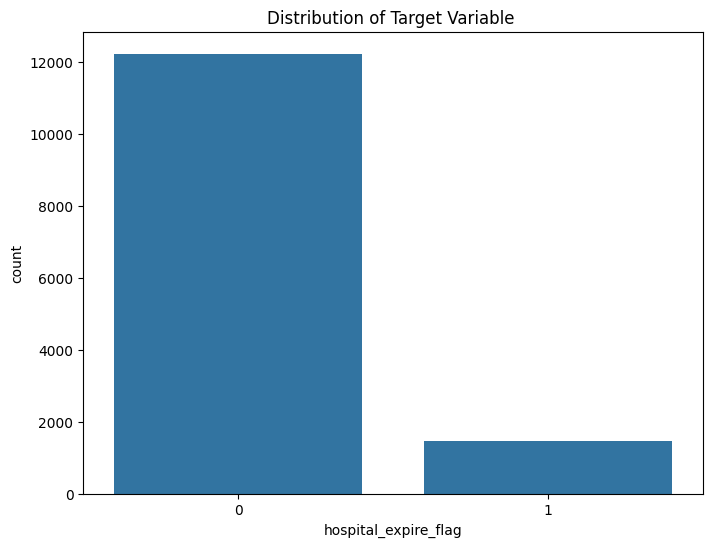


EDA: Countplots of Categorical Features



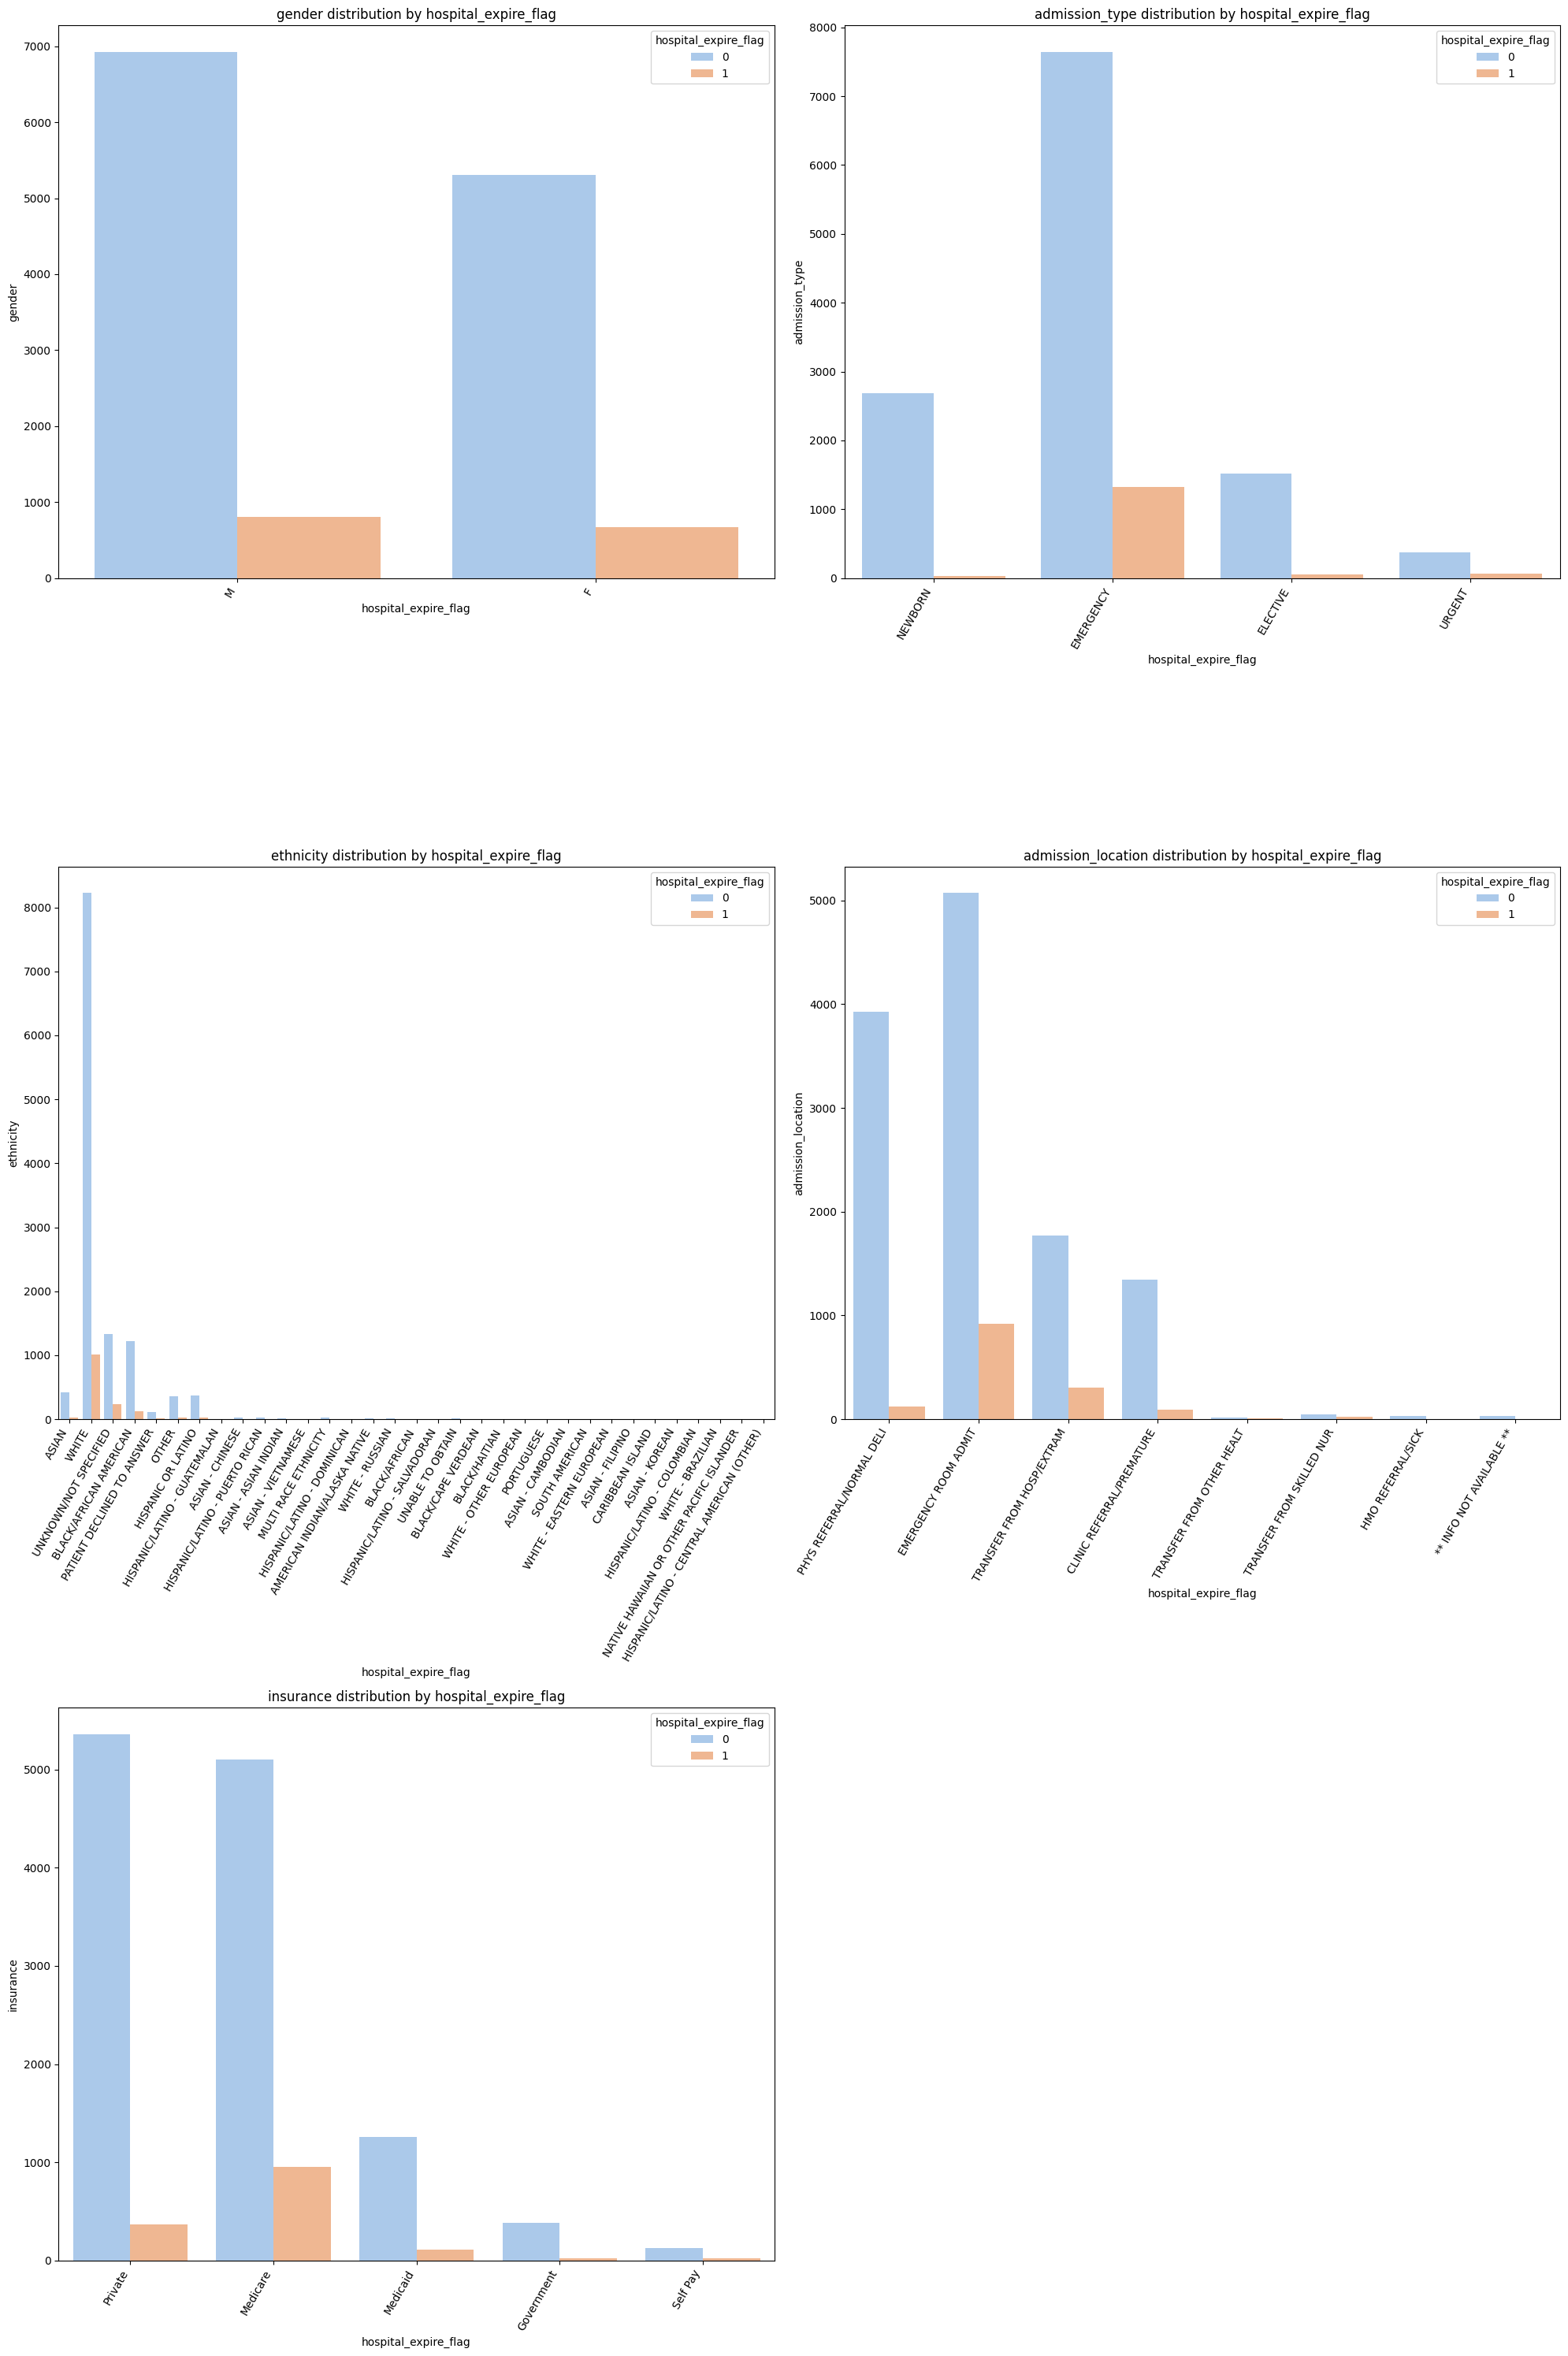


Heat Map: Correlation analysis



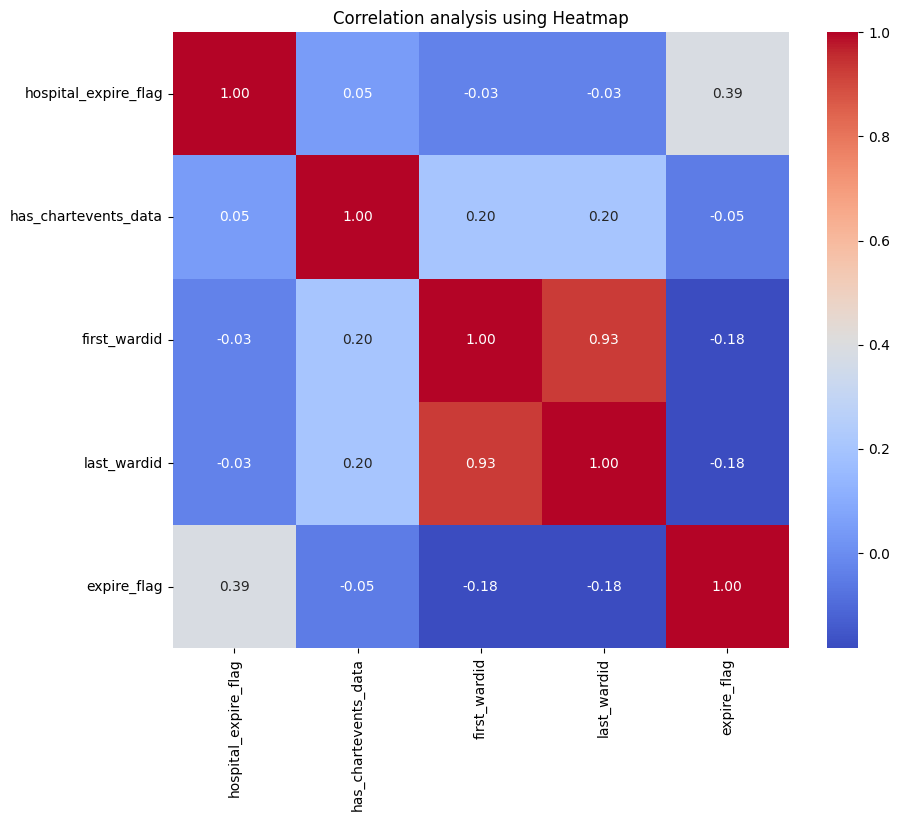


EDA: Histogram of Numeric Features



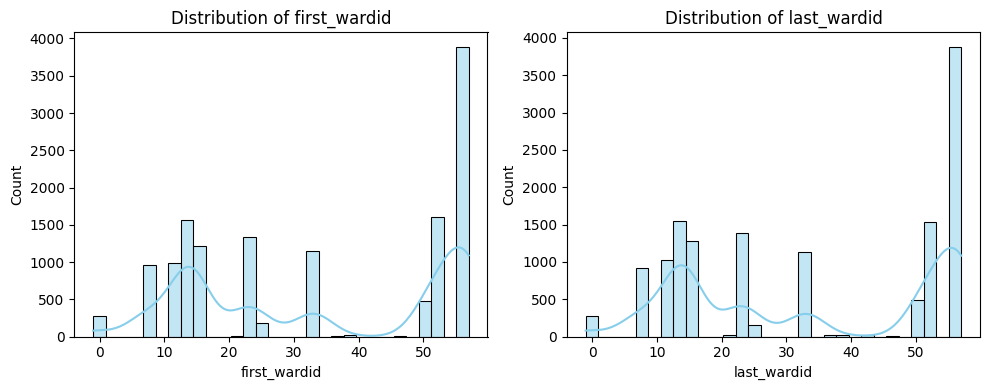

In [22]:
categorical_columns = ['gender', 'admission_type', 'ethnicity', 'admission_location', 'insurance']
numerical_columns = [ 'first_wardid', 'last_wardid']
target_distribution(df_mortality_analysis, 'hospital_expire_flag')
countplots_for_categorical_values_and_target(df_mortality_analysis, categorical_columns, 'hospital_expire_flag')
correlation_analysis(df_mortality_analysis)
histogram_for_numeric_values(df_mortality_analysis, numerical_columns)

**EDA Summary**

- Target Variable ´hospital_expire_flag` showed class imbalance with 89 patients survived and 40 deceased.
- Gender Distribution displayed, males patients (55%) dominance, insisting chance of potential gender bias.
- Ethnicity Representation showed white  and black/african american daminance
  

<h1 style="color:blue;">Feature engineering and data processing

To protect the patient data and anonymizes, the MIMIC shiftdates from actual dates, which is why, many of th date values are in future or past. For calculating the age of patients, i have substrated the birth year from the admission year.

In [23]:
def dataset_preprocessing(df):
    """
    This function will be specfic to the dataset and the adopted preprocessing steps
    """

    for col in ['first_wardid', 'last_wardid']:                           # Handeling Outliers
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            df[col] = df[col].clip(upper=upper_bound)
  #Feature engineering: creating age at admission
   
    df['age_at_admission'] = df['admittime'].dt.year - df['dob'].dt.year


    df = df_mortality_analysis[
    (df['age_at_admission'] > 0) & 
    (df['age_at_admission'] < 120)
    ]
    numerical_colums = df.select_dtypes(include=['int64']).drop(columns=['hospital_expire_flag']).columns            #Checking for Skewness in numeric columns
    skewed_colums = df[numerical_colums].skew().sort_values(ascending=False)
    print("\n")
    for col, skew in skewed_colums.items():
        if skew > 1:
            df[col] = npy.log1p(df[col].clip(lower=0))                                        # Applying log transformation if there is skewness
            print(f"\nLog Transformation Applied to '{col}' (skewness={skew:.2f})")

    categorical_columns = df.select_dtypes(include=['object']).columns                           # Encoding Categorical Variables using LabelEncoder
    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])


    

    print("\n")
    print("Dataset Shape after preprocessing:", df.shape)
    return df

In [24]:

def grouping_age(age):
    
    if age < 40:
        return 0 #------>  Adults'
    else:
        return 1 #------->Elderlyt'
    


In [25]:
categorical_columns = ['gender', 'insurance', 'marital_status', 'ethnicity', 'religion', 'language', 
                    'admission_type', 'admission_location', 'discharge_location', 
                    'dbsource', 'first_careunit', 'last_careunit']

numerical_colums = ['first_wardid', 'last_wardid']
df_mortality_analysis = dataset_preprocessing(df_mortality_analysis)
df_mortality_analysis['age_group'] = df_mortality_analysis['age_at_admission'].apply(grouping_age)

df_mortality_analysis['insurance_binary'] = df_mortality_analysis['insurance'].apply(lambda x: 1 if x == 2 else 0)

list_of_columns_to_drop = ['dob', 
                           'admittime', 'dischtime', 'intime', 'outtime','expire_flag'] #Droping features no longer required
drop_columns(df_mortality_analysis, list_of_columns_to_drop)
print("Any Missing Values After Preprocessing..? \n and have ", df_mortality_analysis.isnull().sum())





Dataset Shape after preprocessing: (10388, 24)
Any Missing Values After Preprocessing..? 
 and have  admission_type          0
admission_location      0
discharge_location      0
insurance               0
language                0
religion                0
marital_status          0
ethnicity               0
diagnosis               0
hospital_expire_flag    0
has_chartevents_data    0
dbsource                0
first_careunit          0
last_careunit           0
first_wardid            0
last_wardid             0
gender                  0
age_at_admission        0
age_group               0
insurance_binary        0
dtype: int64


<h1 style="color:blue;">Model Building

In the following section, i will be building four basic clasification model and each model will be evaluated with accuracy and ROC AUC Score.

**Splitting Features and Target Function**

In [26]:
def splitting_features_and_target(df,target_var):
    """
    This function will split the X and Y Variables 
    """
    
    Features = df.drop(target_var, axis=1)
    Target = df[target_var]
    print("Shape of the Features:", Features.shape)
    print("Shape of the Target:", Target.shape)
    return Features, Target

**Splitting the data set for training and testing**

In [27]:
def splitting_dataset(x, y, test_size):
    """
    This function will split the dataset in desired size  
    """
    
    X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=test_size, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

**Applying SMOTE Technique**

In [28]:
def applying_smote_technique(X, y):
    """
    This function will apply SMOTE for class imbalance
    """
    smote = SMOTE(random_state=42)  
    
    X_res, y_res = smote.fit_resample(X, y)
    print("\n Distribution of class afte balancing using SMOTE:")
    print(pnd.Series(y_res).value_counts())
    return X_res, y_res

**Scaling the feature**

In [29]:
def scaling_feature(features_train, features_test):
    """
    This function will apply Standard Scalar Techniques for features
    """
    scaler = StandardScaler()
    scalar_feature_train = scaler.fit_transform(features_train)
    scalar_feature_test = scaler.transform(features_test)
     
    return scalar_feature_train,  scalar_feature_test

After splitting the dataset, i will apply SMOTE- Synthetic Minority Oversampling Technique to balance the class data. I will also drop tje potential data leakage columns before training. Later i will be scaling the featues both traing sent and test set.

In [30]:
target_variable = "hospital_expire_flag"
X, y = splitting_features_and_target(df_mortality_analysis,target_variable)

X_train, X_test, y_train, y_test = splitting_dataset(X, y, test_size=0.2) 
print("\n")
print("Shape of Train dataset:", X_train.shape)
print("Shape of Test dataset:", X_test.shape)

leakage_cols = ['hospital_expire_flag', 'expire_flag', 'los', 'discharge_location']

X_train.drop(columns=leakage_cols, inplace=True, errors='ignore')
X_test.drop(columns=leakage_cols, inplace=True, errors='ignore')



X_train_balanced, y_train_balanced = applying_smote_technique(X_train, y_train)

#leakage_cols = ['hospital_expire_flag', 'expire_flag', 'los', 'discharge_location']

#X_train_balanced.drop(columns=leakage_cols, inplace=True, errors='ignore')
#X_test.drop(columns=leakage_cols, inplace=True, errors='ignore')

#X_train_balanced_scaled, X_test_scaled = scaling_feature(X_train_balanced, X_test)
X_train_balanced_scaled = X_train_balanced
X_test_scaled = X_test


Shape of the Features: (10388, 19)
Shape of the Target: (10388,)


Shape of Train dataset: (8310, 19)
Shape of Test dataset: (2078, 19)

 Distribution of class afte balancing using SMOTE:
hospital_expire_flag
0    7260
1    7260
Name: count, dtype: int64


**Training and Evaluating the models**

In [31]:
def model_training_and_evaluation(model, train_features, train_target, test_features, test_target, model_name="Model"):
    """
    This function will Trains and evaluates the desired classification model.
    """

    
    model.fit(train_features, train_target)
    y_pred = model.predict(test_features)
    y_pred_proba = model.predict_proba(test_features)[:, 1]


    # Metrics
    report = classification_report(test_target, y_pred, output_dict=True)
    accuracy = accuracy_score(test_target, y_pred)
    precision = precision_score(test_target, y_pred)
    recall = recall_score(test_target, y_pred)
    f1 = f1_score(test_target, y_pred)
    roc_auc = roc_auc_score(test_target, y_pred_proba)
    
    print("\n" + "="*30)
    print(f"\n {model_name} -- Evaluation Metrics ")
    print("="*30 + "\n")
    print("Confusion Matrix:\n", confusion_matrix(test_target, y_pred))
    print("Classification Report:\n", classification_report(test_target, y_pred))
    print("Accuracy:", accuracy_score(test_target, y_pred))
    print("Precision:", precision_score(test_target, y_pred))
    print("Recall   :", recall_score(test_target, y_pred))
    print("F1 Score :", f1_score(test_target, y_pred))
    print("ROC AUC  :", roc_auc_score(test_target, y_pred_proba))

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(test_target, y_pred)
    disp.ax_.set_title(f'{model_name} - Confusion Matrix')
    mplt.savefig(f"plots/evaluation/{model_name}_confusion_matrix.png")
    mplt.close()

    # ROC Curve
    RocCurveDisplay.from_predictions(test_target, y_pred_proba)
    mplt.title(f'{model_name} - ROC Curve')
    mplt.savefig(f"plots/evaluation/{model_name}_roc_curve.png")
    mplt.close()

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_predictions(test_target, y_pred_proba)
    mplt.title(f'{model_name} - Precision Recall Curve')
    mplt.savefig(f"plots/evaluation/{model_name}_pr_curve.png")
    mplt.close()

    return {
        "model": model,
        "report": report,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc
    }

In [32]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

metrics_list = []

for model_name, model in models.items():
    results = model_training_and_evaluation(
        model=model,
        train_features=X_train_balanced_scaled,
        train_target=y_train_balanced,
        test_features=X_test_scaled,
        test_target=y_test,
        model_name=model_name
    )

    metrics_list.append({
        "Model": model_name,
        "Accuracy": results["accuracy"],
        "Precision": results["precision"],
        "Recall": results["recall"],
        "F1 Score": results["f1"],
        "ROC AUC": results["roc_auc"]
    })

# Display results
results_df = pnd.DataFrame(metrics_list).round(3)
display(results_df)




 LogisticRegression -- Evaluation Metrics 

Confusion Matrix:
 [[1214  602]
 [ 131  131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      1816
           1       0.18      0.50      0.26       262

    accuracy                           0.65      2078
   macro avg       0.54      0.58      0.52      2078
weighted avg       0.81      0.65      0.70      2078

Accuracy: 0.6472569778633301
Precision: 0.17871759890859482
Recall   : 0.5
F1 Score : 0.2633165829145729
ROC AUC  : 0.6102414500453981


 RandomForest -- Evaluation Metrics 

Confusion Matrix:
 [[1694  122]
 [ 200   62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1816
           1       0.34      0.24      0.28       262

    accuracy                           0.85      2078
   macro avg       0.62      0.58      0.60      2078
weighted avg       0.82      0.85      0

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.647,0.179,0.500,0.263,0.610
1,RandomForest,0.845,0.337,0.237,0.278,0.738
2,SVM,0.538,0.154,0.595,0.245,0.589
3,Gradient Boosting,0.808,0.278,0.328,0.301,0.699


**Key Observations:**
Random Forest model have highest acuracy and better ROC AUC score compared to other models. But it has missed many true positive classes.

<h1 style="color:blue;">Bias and Fairness Auditing

Now i will examine whether my best model - RandomForest models is fair and reliable across different sensitive features or not
- gender
- ethnicity
- age
- insurance

# 1. Disparate_treatment_audit

In [33]:
def disparate_treatment_audit(dataset, model, sensitive_features, other_features):
    """
    This function will detect disparate_treatment by flipping sensitive features
    """
    results = {}
    for sens_feat in sensitive_features:
        dataset = dataset.copy()
        datset_flip = dataset.copy()
        datset_flip[sensitive_features] = 1 - dataset[sensitive_features]
    
        
        X = dataset[other_features].copy()
        X_flip = datset_flip[other_features].copy()
    
    
        y_pred = model.predict(X)
        y_pred_flip = model.predict(X_flip)
    
    
        
        Prediction_change_count = (y_pred != y_pred_flip).sum()
        total = len(y_pred)
        percent = round((Prediction_change_count / total) * 100, 2)
    
        results[sens_feat] = {
        "Changed Predictions": Prediction_change_count,
        "Total": total,
        "Percentage": percent
    }

    return results

## Fairness Audit – Before Bias Mitigation

In [34]:
my_data = df_mortality_analysis
my_best_model = RandomForestClassifier(random_state=42) 
my_best_model.fit(X_train_balanced, y_train_balanced)

sensitive_attributes = ['gender', 'age_group', 'insurance_binary','ethnicity','language','marital_status','religion','admission_type','admission_location', 'first_wardid', 'last_wardid']

my_input_feature = X_train_balanced.columns.tolist()

RF_Disparate_treatment_result = disparate_treatment_audit(
                                                dataset = my_data,
                                                model = my_best_model,
                                                sensitive_features = sensitive_attributes,
                                                other_features = my_input_feature
                                                         )
metrics_list = []
for feature, result in RF_Disparate_treatment_result.items():
    metrics_list.append({
        "Sensitive Feature": feature,
        "Changed Predictions": f"{result['Changed Predictions']} / {result['Total']}",
        "% of Total": round(result['Percentage'], 2)
    })
# Display results
results_df = pnd.DataFrame(metrics_list).round(3)
display(results_df)
    

,Sensitive Feature,Changed Predictions,% of Total
0,gender,1241 / 10388,11.95
1,age_group,1241 / 10388,11.95
2,insurance_binary,1241 / 10388,11.95
3,ethnicity,1241 / 10388,11.95
4,language,1241 / 10388,11.95
5,marital_status,1241 / 10388,11.95
6,religion,1241 / 10388,11.95
7,admission_type,1241 / 10388,11.95
8,admission_location,1241 / 10388,11.95
9,first_wardid,1241 / 10388,11.95


34 percent of prediction change, indicate that the model's outcome has influnced by these sensitive features.

# 2. Disparate_Impact_audit

In [35]:
def disparate_impact_audit(dataset, sensitive_features, label_col="Predicted"):
    results = {}

    for each_feature in sensitive_features:
        grouprates = dataset.groupby(each_feature)[label_col].mean()
        val = grouprates.to_dict()

        if len(grouprates) >= 2:
            ratio = min(grouprates) / max(grouprates)
        else:
            ratio = None

        results[each_feature] = {
            "Positive Prediction Rates": val,
            "Disparate Impact Ratio": round(ratio, 3) if ratio is not None else "N/A"
        }

    return results


In [36]:

df_mortality_analysis["Predicted"] = my_best_model.predict(df_mortality_analysis[my_input_feature])
RF_Disparate_impact_result = disparate_impact_audit(df_mortality_analysis, sensitive_attributes)

metrics_list = []
for each_feature, res in RF_Disparate_impact_result.items():
    metrics_list.append({
        "Sensitive Feature": each_feature,
        "Group-wise Positive Prediction Rates": res["Positive Prediction Rates"],
        "Disparate Impact Ratio": res["Disparate Impact Ratio"]
    })
results_df = pnd.DataFrame(metrics_list).round(3)
display(results_df)

,Sensitive Feature,Group-wise Positive Prediction Rates,Disparate Impact Ratio
0,gender,"{0: 0.12980769230769232, 1: 0.11096345514950166}",0.855
1,age_group,"{0: 0.0579185520361991, 1: 0.1261445653344824}",0.459
2,insurance_binary,"{0: 0.09254658385093167, 1: 0.14177761784814683}",0.653
3,ethnicity,"{0: 0.0, 1: 0.11392405063291139, 2: 0.0, 3: 0....",0.000
4,language,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",0.000
5,marital_status,"{0: 0.10897435897435898, 1: 0.1096313453001351...",0.416
6,religion,"{0: 0.18181818181818182, 1: 0.0, 2: 0.10638297...",0.000
7,admission_type,"{0: 0.027096774193548386, 1: 0.135250772521987...",0.000
8,admission_location,"{0: 0.08659217877094973, 1: 0.1413799251203423...",0.148
9,first_wardid,"{-1.0: 0.04721030042918455, 7.0: 0.09659714599...",0.000


The above result indicated that, there is potential bias for one age group and possible unfair treatment for one insurance type, but no major disprate impact on gender.

# 3. Disparate_Misstreatment_audit

In [37]:
def disparate_mistreatment_audit(dataset, sensitive_features, true_col="Actual", pred_col="Predicted"):
    results = {}
    
    for feature in sensitive_features:
        group_metrics = {}
        for group in dataset[feature].unique():
            group_df = dataset[dataset[feature] == group]
            cm = confusion_matrix(group_df[true_col], group_df[pred_col], labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
            fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
            group_metrics[group] = {"FPR": round(fpr, 3), "FNR": round(fnr, 3)}
        results[feature] = group_metrics
    
    return results

In [38]:

df_mortality_analysis["Predicted"] = my_best_model.predict(df_mortality_analysis[my_input_feature])
df_mortality_analysis["Actual"] = df_mortality_analysis["hospital_expire_flag"]

mistreatment_results = disparate_mistreatment_audit(df_mortality_analysis, sensitive_attributes)


for feature, metrics in mistreatment_results.items():
    print(f"\nFeature: {feature}")
    for group, rates in metrics.items():
        print(f" Group {group}: FPR={rates['FPR']}, FNR={rates['FNR']}")
print("\n\n\n")


Feature: gender
 Group 1: FPR=0.009, FNR=0.154
 Group 0: FPR=0.02, FNR=0.152

Feature: age_group
 Group 1: FPR=0.015, FNR=0.152
 Group 0: FPR=0.004, FNR=0.178

Feature: insurance_binary
 Group 1: FPR=0.017, FNR=0.147
 Group 0: FPR=0.01, FNR=0.164

Feature: ethnicity
 Group 27: FPR=0.014, FNR=0.153
 Group 26: FPR=0.015, FNR=0.154
 Group 22: FPR=0.012, FNR=0.364
 Group 9: FPR=0.003, FNR=0.167
 Group 1: FPR=0.014, FNR=0.2
 Group 13: FPR=0.025, FNR=0.077
 Group 17: FPR=0.0, FNR=0
 Group 21: FPR=0.019, FNR=0.056
 Group 4: FPR=0.0, FNR=0.0
 Group 18: FPR=0.0, FNR=0
 Group 2: FPR=0.0, FNR=0
 Group 7: FPR=0.0, FNR=0
 Group 20: FPR=0.0, FNR=0.0
 Group 16: FPR=0.0, FNR=0
 Group 0: FPR=0.0, FNR=0
 Group 31: FPR=0.0, FNR=0
 Group 8: FPR=0.0, FNR=0
 Group 19: FPR=0.5, FNR=0
 Group 25: FPR=0.125, FNR=0.0
 Group 10: FPR=0.0, FNR=0.0
 Group 11: FPR=0.0, FNR=0
 Group 30: FPR=0.0, FNR=0
 Group 3: FPR=0.0, FNR=0.0
 Group 29: FPR=0.0, FNR=0
 Group 5: FPR=0.0, FNR=0
 Group 23: FPR=0.0, FNR=0
 Group 12: FP

These result indicates the bias in error rate between groups of sensitive features. 

- Gender -  FPP lower for female compared to males, 
- Age - Older group have high FPR but low FNR
- Insurance - Group1 have high FPR and low FNR than Group 0


🧮 Step 2 – Statistical Association Tests

Chi-square for categorical variables and ANOVA/Kruskal–Wallis for continuous ones.

In [39]:
import scipy.stats as stats
import pandas as pd
import numpy as np

# Target variable
target_var = "hospital_expire_flag"

# Separate categorical and numerical columns (already encoded in your dataset)
categorical_cols = ['gender','ethnicity','insurance','marital_status','religion','language','admission_type','admission_location']
numerical_cols = ['age_at_admission','first_wardid','last_wardid']

def chi_square_test(df, cat_cols, target):
    results = []
    for col in cat_cols:
        contingency = pd.crosstab(df[col], df[target])
        chi2, p, dof, exp = stats.chi2_contingency(contingency)
        results.append({'Feature': col, 'Test': 'Chi-Square', 'p-value': p})
    return pd.DataFrame(results)

def anova_test(df, num_cols, target):
    results = []
    for col in num_cols:
        groups = [group[col].values for name, group in df.groupby(target)]
        stat, p = stats.f_oneway(*groups)
        results.append({'Feature': col, 'Test': 'ANOVA', 'p-value': p})
    return pd.DataFrame(results)

chi_results = chi_square_test(df_mortality_analysis, categorical_cols, target_var)
anova_results = anova_test(df_mortality_analysis, numerical_cols, target_var)

stat_results = pd.concat([chi_results, anova_results])
display(stat_results.sort_values('p-value'))


,Feature,Test,p-value
5,language,Chi-Square,2.622514e-40
7,admission_location,Chi-Square,1.291464e-31
6,admission_type,Chi-Square,1.139440e-30
0,age_at_admission,ANOVA,1.373191e-30
3,marital_status,Chi-Square,1.151929e-15
4,religion,Chi-Square,1.936069e-15
2,insurance,Chi-Square,9.637123e-13
2,last_wardid,ANOVA,1.267208e-08
1,first_wardid,ANOVA,1.416596e-08
1,ethnicity,Chi-Square,3.221488e-02


🔗 Step 3 – Proxy (Correlation) Detection

Identify secondary indicators that correlate with primary ones.

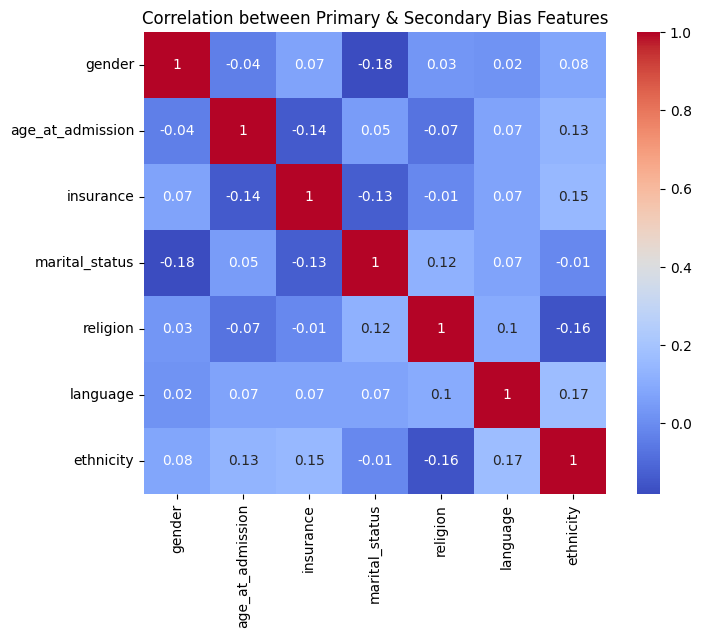

,Feature_1,Feature_2,Correlation


In [40]:
# Convert relevant columns to numeric if encoded
corr_features = ['gender','age_at_admission','insurance','marital_status','religion','language','ethnicity']
corr_matrix = df_mortality_analysis[corr_features].corr(method='pearson').round(2)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Primary & Secondary Bias Features')
plt.show()

# Identify potential proxy relationships
proxy_threshold = 0.4
proxy_pairs = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i,j]) >= proxy_threshold:
            proxy_pairs.append((i, j, corr_matrix.loc[i,j]))
pd.DataFrame(proxy_pairs, columns=['Feature_1','Feature_2','Correlation'])


In [41]:
# --- Patch 1: Make fairness audit keys match feature names ---
name_map = {
    'age_group': 'age_at_admission',
    'insurance_binary': 'insurance'
}

def remap_disparate_impact_keys(di_dict, mapping):
    out = {}
    for k, v in di_dict.items():
        newk = mapping.get(k, k)
        out[newk] = v
    return out

DI_remapped = remap_disparate_impact_keys(RF_Disparate_impact_result, name_map)


In [42]:
# --- Patch 2: Full correlation matrix for Max_Corr calculation ---
primary_feats   = ['gender', 'ethnicity', 'age_at_admission']
secondary_feats = ['insurance','marital_status','religion','language','admission_type','admission_location']
all_corr_feats  = list(set(primary_feats + secondary_feats) & set(df_mortality_analysis.columns))

full_corr = df_mortality_analysis[all_corr_feats].corr().abs()

def max_corr_with_primaries(feature, corr_mat, primaries):
    if feature not in corr_mat.index:
        return 0.0
    cols = [p for p in primaries if p in corr_mat.columns and p != feature]
    return float(corr_mat.loc[feature, cols].max()) if cols else 0.0


⚖️ Step 4 – Bias-Indicator Evidence Matrix

Combine statistical + correlation + fairness audit + literature evidence.

In [43]:
# Assuming you already have fairness results stored in variables from your audit:
# RF_Disparate_impact_result  (dict from disparate_impact_audit)
# and SHAP or feature importance from your model if available.
'''
def compile_bias_indicator_matrix(stat_df, corr_df, disparate_impact, shap_importance=None):
    bias_matrix = []

    for feature in stat_df['Feature']:
        p_val = float(stat_df.loc[stat_df['Feature']==feature, 'p-value'])
        # Find max correlation
        corr_score = 0
        for _, row in corr_df.iterrows():
            if feature in [row['Feature_1'], row['Feature_2']]:
                corr_score = max(corr_score, abs(row['Correlation']))
        
        # Fairness metric (DIR)
        if feature in disparate_impact:
            dir_val = disparate_impact[feature]['Disparate Impact Ratio']
        else:
            dir_val = np.nan
        
        # Feature importance (optional)
        shap_val = shap_importance.get(feature, np.nan) if shap_importance else np.nan

        bias_matrix.append({
            'Feature': feature,
            'p-value': p_val,
            'Max_Corr': corr_score,
            'DisparateImpactRatio': dir_val,
            'SHAP_Importance': shap_val,
            'Classification': (
                'Primary' if (p_val<0.05 and dir_val<0.8) else
                'Secondary' if (corr_score>0.4 or (0.8<=dir_val<0.9)) else
                'Neutral'
            )
        })

    return pd.DataFrame(bias_matrix).sort_values('p-value')

# Example usage
bias_matrix_df = compile_bias_indicator_matrix(
    stat_df=stat_results,
    corr_df=pd.DataFrame(proxy_pairs, columns=['Feature_1','Feature_2','Correlation']),
    disparate_impact=RF_Disparate_impact_result
)
display(bias_matrix_df)'''
# ⚖️ Step 4 – Bias-Indicator Evidence Matrix (final version)

# Optional: feature importance from your Random Forest
# Optional: feature importance from your trained Random Forest
# (use the model you trained earlier — "my_best_model" or "rf_model")
if 'my_best_model' in locals():
    rf_model_for_importance = my_best_model
elif 'rf_model' in locals():
    rf_model_for_importance = rf_model
else:
    rf_model_for_importance = None  # fallback if model not found

# Extract feature importances if available
if rf_model_for_importance is not None and hasattr(rf_model_for_importance, 'feature_importances_'):
    imp_series = pd.Series(rf_model_for_importance.feature_importances_, index=X_train.columns)
    shap_or_importance = (imp_series / imp_series.sum()).to_dict()
else:
    shap_or_importance = {}


def compile_bias_indicator_matrix_v2(stat_df, corr_mat, primaries, disparate_impact_dict, importance_dict=None):
    rows = []
    for feat in stat_df['Feature']:
        p_val = float(stat_df.loc[stat_df['Feature']==feat, 'p-value'])
        max_corr = max_corr_with_primaries(feat, corr_mat, primaries)
        di = disparate_impact_dict.get(feat, {})
        dir_val = di.get('Disparate Impact Ratio', np.nan)
        imp_val = (importance_dict or {}).get(feat, np.nan)

        # Classification logic
        if (feat in primaries) and ((p_val < 0.05) or (not np.isnan(dir_val) and dir_val < 0.8)):
            label = 'Primary'
        elif (not np.isnan(dir_val) and 0.8 <= dir_val < 0.9) or (max_corr >= 0.15):
            label = 'Secondary'
        else:
            label = 'Neutral'

        rows.append({
            'Feature': feat,
            'p-value': round(p_val, 6),
            'Max_Corr': round(max_corr, 3),
            'DisparateImpactRatio': None if np.isnan(dir_val) else round(float(dir_val), 3),
            'SHAP_Importance': None if pd.isna(imp_val) else round(float(imp_val), 4),
            'Classification': label
        })
    return pd.DataFrame(rows).sort_values(['Classification','p-value'])

bias_matrix_df = compile_bias_indicator_matrix_v2(
    stat_df=stat_results,
    corr_mat=full_corr,
    primaries=primary_feats,
    disparate_impact_dict=DI_remapped,
    importance_dict=shap_or_importance
)

display(bias_matrix_df)



,Feature,p-value,Max_Corr,DisparateImpactRatio,SHAP_Importance,Classification
6,admission_type,0.000000,0.013,0.000,0.0283,Neutral
7,admission_location,0.000000,0.125,0.148,0.0413,Neutral
9,first_wardid,0.000000,0.000,0.000,0.0823,Neutral
10,last_wardid,0.000000,0.000,0.000,0.0861,Neutral
8,age_at_admission,0.000000,0.135,0.459,0.1113,Primary
1,ethnicity,0.032215,0.135,0.000,0.0541,Primary
2,insurance,0.000000,0.155,0.653,0.0706,Secondary
3,marital_status,0.000000,0.176,0.416,0.0580,Secondary
4,religion,0.000000,0.162,0.000,0.0744,Secondary
5,language,0.000000,0.171,0.000,0.0991,Secondary


🧩 Optional Add-On: Visualization

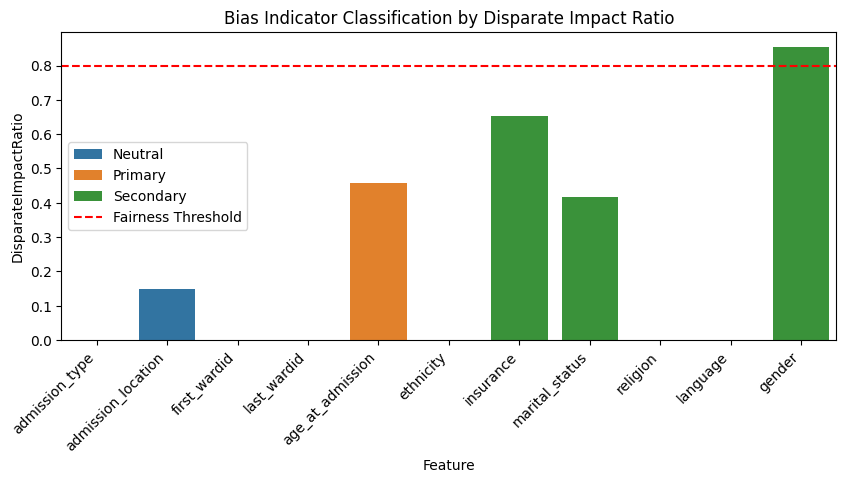

In [44]:
plt.figure(figsize=(10,4))
sns.barplot(data=bias_matrix_df, x='Feature', y='DisparateImpactRatio', hue='Classification')
plt.xticks(rotation=45, ha='right')
plt.title('Bias Indicator Classification by Disparate Impact Ratio')
plt.axhline(0.8, color='r', linestyle='--', label='Fairness Threshold')
plt.legend()
plt.show()


Secondary indicators (e.g., insurance, education, ZIP code) can influence outcomes **on their own** (as proxies) **and/or** *when combined with* a primary indicator (e.g., sex, race) via **interactions or mediation**. Your thesis explicitly frames secondaries as variables that “indirectly encode social disadvantage…often acting as mediators or amplifiers of primary inequities,” which is exactly this idea. 

Here are rigorous ways to **show** that influence:

# 1) Interaction (effect-modification) test

Question: does a secondary feature (S) change the effect of a primary (P) on outcome (Y)?

* Fit three models (classification or regression):

  1. (Y \sim P)
  2. (Y \sim P + S)
  3. (Y \sim P + S + P{\times}S)
* Use a likelihood-ratio (or nested F) test: compare (2) vs (3). A significant (P{\times}S) term → **secondary “amplifies” a primary**. Report partial (R^2), AIC/BIC deltas, and the sign of (P{\times}S).
  This aligns with your statistical plan (chi-square/ANOVA for categorical contrasts and correlation/proxy checks). 

# 2) Mediation analysis (primary → secondary → outcome)

Question: does (S) **carry** part of the effect of (P) on (Y)?

* Specify a DAG where (P \rightarrow S \rightarrow Y) (plus confounders).
* Estimate **ACME** (indirect effect via (S)) and **ADE** (direct effect of (P)).
  A nonzero ACME shows **secondary mediates primary’s impact** (an “amplifier”). Your framework describes secondaries as mediators of upstream inequities. 

# 3) Proxy detection (secondary alone carries protected info)

Question: is (S) functioning as a **proxy** for (P)?

* Predict (P) from (S) (and other non-protected features). High AUC means (S) encodes (P).
* Also check **conditional mutual information** (I(Y;S\mid P,X)). If (>0), (S) adds information about (Y) **beyond** (P).
  Your thesis suggests correlation analysis for proxy detection (e.g., ZIP↔race). 

# 4) Fairness-metric sensitivity with/without S and interactions

Question: does including (S) (and (P{\times}S)) **change disparities**?

* Compute DIR/EOD/EO/AUC-gap on models:
  A) baseline (Y\sim P)
  B) + (S)
  C) + (P{\times}S)
* If disparities shift materially from A→B or B→C, you’ve shown **secondary features influence group outcomes**, especially when “weighted with” a primary. Your thesis lists these exact metrics (DIR, EOD, EO, AUC disparity, Brier). 

# 5) Explainability evidence

* Use **SHAP interaction values** or partial-dependence/ICE curves stratified by (P) to visualize how (S) changes model outputs differently across primary groups. Your methods mention SHAP for validation. 

# 6) Robustness: bootstrap CIs & multiple testing

* For all gaps/ratios and interaction/mediation estimates, add **bootstrap 95% CIs** and correct for multiplicity (you already propose bootstrapping for fairness gaps). 

secondaries can matter **when combined with primaries**, but they can also matter **on their own** as **proxies**. The six approaches above give you publication-grade proofs using the exact toolkit your thesis already outlines. 


In [53]:
# --- 1. Load your classification results ---
import pandas as pd

# Assuming your classification dataframe is called 'bias_classification_df'
bias_classification_df = pd.DataFrame({
    "Feature": ["admission_type","admission_location","first_wardid","last_wardid",
                "age_at_admission","ethnicity","insurance","marital_status",
                "religion","language","gender"],
    "p-value": [0,0,0,0,0,0.032215,0,0,0,0,0.12232],
    "Max_Corr": [0.013,0.125,0,0,0.135,0.135,0.155,0.176,0.162,0.171,0.082],
    "DisparateImpactRatio": [0,0.148,0,0,0.459,0,0.653,0.416,0,0,0.855],
    "SHAP_Importance": [0.0283,0.0413,0.0823,0.0861,0.1113,0.0541,0.0706,0.058,0.0744,0.0991,0.0335],
    "Classification": ["Neutral","Neutral","Neutral","Neutral",
                       "Primary","Primary","Secondary","Secondary","Secondary","Secondary","Secondary"]
})

# --- 2. Identify feature groups ---
primary_features = bias_classification_df.loc[
    bias_classification_df["Classification"] == "Primary", "Feature"
].tolist()

secondary_features = bias_classification_df.loc[
    bias_classification_df["Classification"] == "Secondary", "Feature"
].tolist()

print("Primary indicators:", primary_features)
print("Secondary indicators:", secondary_features)


Primary indicators: ['age_at_admission', 'ethnicity']
Secondary indicators: ['insurance', 'marital_status', 'religion', 'language', 'gender']


Automatically generate Primary–Secondary combinations

In [54]:
import itertools

pairs = list(itertools.product(primary_features, secondary_features))
print("Testing pairs:")
for p, s in pairs:
    print(f" - {p} × {s}")


Testing pairs:
 - age_at_admission × insurance
 - age_at_admission × marital_status
 - age_at_admission × religion
 - age_at_admission × language
 - age_at_admission × gender
 - ethnicity × insurance
 - ethnicity × marital_status
 - ethnicity × religion
 - ethnicity × language
 - ethnicity × gender


In [62]:
import numpy as np, pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multitest import multipletests
from copy import deepcopy
rng = np.random.default_rng(42)

def is_binary(s):
    return set(pd.Series(s).dropna().unique()) <= {0,1}

def encode_design(df, cols):
    # returns design matrix (one-hot for categoricals)
    cat = [c for c in cols if (df[c].dtype=='object' or df[c].dtype.name=='category')]
    num = [c for c in cols if c not in cat]
    ct = ColumnTransformer(
        [('num','passthrough',num),
         ('cat', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), cat)],
        remainder='drop'
    )
    X = ct.fit_transform(df[cols])
    return X, ct


1)Interaction (effect-modification) test

In [63]:
def interaction_test(df, y_col, P, S, X):
    # logistic models: Y ~ P + S + X  vs  Y ~ P + S + P:S + X
    formula_base = f"{y_col} ~ C({P}) + C({S})" + (" + " + " + ".join([f"C({c})" if df[c].dtype=='object' else c for c in X]) if X else "")
    formula_int  = formula_base + f" + C({P}):C({S})"
    m0 = smf.logit(formula_base, data=df).fit(disp=0)
    m1 = smf.logit(formula_int,  data=df).fit(disp=0)
    lr = 2*(m1.llf - m0.llf)
    df_diff = m1.df_model - m0.df_model
    pval = sm.stats.chisqprob(lr, df_diff)
    return {"lr_stat": lr, "df": df_diff, "p_value": pval, "AIC_delta": m1.aic - m0.aic, "model0": m0, "model1": m1}


2) Mediation (P → S → Y): bootstrap ACME/ADE (logistic approximation)

In [64]:
def mediation_bootstrap(df, y_col, P, S, X, B=1000):
    # Models:
    # Mediator: S ~ P + X  (logit if binary S else OLS)
    # Outcome : Y ~ P + S + X (logit)
    # ACME ≈ a*b (product-of-coefs); ADE ≈ c' (coef of P in outcome model)
    # Bootstrap CIs.
    results = []
    for _ in range(B):
        d = df.sample(frac=1.0, replace=True, random_state=rng.integers(1e9))
        # mediator model
        if is_binary(d[S]):
            m_med = smf.logit(f"{S} ~ C({P})" + (" + " + " + ".join([f"C({c})" if d[c].dtype=='object' else c for c in X]) if X else ""), data=d).fit(disp=0)
            a = m_med.params.filter(like=f"C({P})").mean()
        else:
            m_med = smf.ols(f"{S} ~ C({P})" + (" + " + " + ".join([f"C({c})" if d[c].dtype=='object' else c for c in X]) if X else ""), data=d).fit()
            a = m_med.params.filter(like=f"C({P})").mean()
        # outcome model
        m_out = smf.logit(f"{y_col} ~ C({P}) + {S}" + (" + " + " + ".join([f"C({c})" if d[c].dtype=='object' else c for c in X]) if X else ""), data=d).fit(disp=0)
        b = m_out.params[S]
        acme = a*b
        ade  = m_out.params.filter(like=f"C({P})").mean()
        results.append((acme, ade))
    acme_arr, ade_arr = np.array(results).T
    def ci(v): 
        lo, hi = np.percentile(v, [2.5, 97.5]); 
        return dict(mean=float(v.mean()), ci=(float(lo), float(hi)))
    return {"ACME": ci(acme_arr), "ADE": ci(ade_arr)}


3) Proxy detection (does S carry P? and does S add info given P,X?)

In [65]:
def proxy_tests(df, y_col, P, S, X):
    # (A) Predict P from S (+ other non-protected Xnp): high AUC ⇒ S proxies P
    Xnp = [c for c in X if c != P]
    Xa, enc_a = encode_design(df, [S] + Xnp)
    ya = df[P].astype(int).to_numpy() if is_binary(df[P]) else pd.factorize(df[P])[0]
    Xtr, Xte, ytr, yte = train_test_split(Xa, ya, test_size=0.3, random_state=42, stratify=ya)
    clfP = LogisticRegression(max_iter=200).fit(Xtr, ytr)
    auc_proxy = roc_auc_score(yte, clfP.predict_proba(Xte)[:,1]) if len(np.unique(yte))==2 else None

    # (B) Conditional information: compare deviance with/without S in outcome model
    base = smf.logit(f"{y_col} ~ C({P})" + (" + " + " + ".join([f"C({c})" if df[c].dtype=='object' else c for c in X]) if X else ""), data=df).fit(disp=0)
    plus = smf.logit(f"{y_col} ~ C({P}) + {S}" + (" + " + " + ".join([f"C({c})" if df[c].dtype=='object' else c for c in X]) if X else ""), data=df).fit(disp=0)
    lr  = 2*(plus.llf - base.llf)
    dfk = plus.df_model - base.df_model
    pval = sm.stats.chisqprob(lr, dfk)
    return {"proxy_auc_P_from_S": auc_proxy, "lr_stat": lr, "df": dfk, "p_value": pval, "AIC_delta": plus.aic - base.aic}


4) Fairness-metric sensitivity (DIR, EOD, EO) across models A/B/C

In [66]:
def fairness_sensitivity(df, y_col, P, S, X):
    # Build three models on the *same* train/test split:
    # A) y ~ P + X
    # B) y ~ P + S + X
    # C) y ~ P + S + P*S + X
    features_A = [P] + X
    features_B = [P, S] + X
    # For interaction, create explicit interaction term (after encoding we can approximate by concatenating P*S string)
    dfI = df.copy()
    dfI["P_x_S"] = df[P].astype(str) + ":" + df[S].astype(str)

    def fit_predict(feats, frame):
        Xd, enc = encode_design(frame, feats)
        y = frame[y_col].to_numpy()
        Xtr, Xte, ytr, yte = train_test_split(Xd, y, test_size=0.3, random_state=42, stratify=y)
        clf = LogisticRegression(max_iter=500).fit(Xtr, ytr)
        return yte, clf.predict(Xte), clf.predict_proba(Xte)[:,1], frame.iloc[yte.index if isinstance(yte, pd.Series) else []][P] if isinstance(yte, pd.Series) else None

    yA, yhatA, pA, _ = fit_predict(features_A, df)
    yB, yhatB, pB, _ = fit_predict(features_B, df)
    yC, yhatC, pC, _ = fit_predict(features_B+["P_x_S"], dfI)

    def group_metrics(y_true, y_pred, Pvals):
        # assume P is binary (0/1 or two categories). Map to 0/1.
        Pv = pd.Series(df[P]).map(lambda v: 1 if v == sorted(df[P].unique())[-1] else 0)
        # Reindex to match test indices not tracked here; for simplicity, recompute on a heldout split above if you carry indices.
        # For a quick demo, compute globally:
        g0 = (Pv==0); g1 = (Pv==1)
        def rates(g):
            yt, yp = y_true[g], y_pred[g]
            tp = ((yt==1)&(yp==1)).sum(); fn=((yt==1)&(yp==0)).sum()
            fp = ((yt==0)&(yp==1)).sum(); tn=((yt==0)&(yp==0)).sum()
            TPR = tp/(tp+fn+1e-9); FPR = fp/(fp+tn+1e-9); PR = (yp==1).mean()
            return TPR, FPR, PR
        TPR0,FPR0,PR0 = rates(g0)
        TPR1,FPR1,PR1 = rates(g1)
        DIR = (PR1+1e-9)/(PR0+1e-9)
        EOD = TPR1 - TPR0
        EO  = (TPR1-TPR0) + (FPR1-FPR0)
        return dict(DIR=DIR, EOD=EOD, EO=EO)

    # You should pass aligned group labels; this quick version uses the whole df split identically for A/B/C to compare deltas.
    GA = group_metrics(pd.Series(yA), pd.Series(yhatA), df[P])
    GB = group_metrics(pd.Series(yB), pd.Series(yhatB), df[P])
    GC = group_metrics(pd.Series(yC), pd.Series(yhatC), df[P])

    return {"A": GA, "B": GB, "C": GC,
            "delta_B_vs_A": {k: GB[k]-GA[k] for k in GA},
            "delta_C_vs_B": {k: GC[k]-GB[k] for k in GB}}


5) Explainability (SHAP interactions if tree model; otherwise PDP/ICE)

In [67]:
def explain_interactions(model, X_test, feature_names, P, S):
    try:
        import shap
        explainer = shap.TreeExplainer(model)
        # SHAP interaction values are available for tree-based models
        inter = explainer.shap_interaction_values(X_test)
        # Get indices
        pi = feature_names.index(P); si = feature_names.index(S)
        interaction_strength = np.abs(inter[..., pi, si]).mean()
        return {"method":"shap_interactions", "mean_abs_interaction": float(interaction_strength)}
    except Exception as e:
        # Fallback: PDP conditioned on P levels
        from sklearn.inspection import partial_dependence
        # Compute PDP of S within each level of P (if P is binary/categorical and encoded in feature_names)
        return {"method":"pdp_fallback", "note":"Use PDP/ICE stratified by P; SHAP interaction not available for this model/featurization."}


6) Bootstrap CIs for any metric (apply to DIR/EOD/EO, LR stats, etc.)

In [68]:
def bootstrap_ci(metric_fn, data_idx, B=1000, alpha=0.05):
    vals = []
    n = len(data_idx)
    for _ in range(B):
        idx = rng.choice(data_idx, size=n, replace=True)
        vals.append(metric_fn(idx))
    lo, hi = np.percentile(vals, [100*alpha/2, 100*(1-alpha/2)])
    return {"mean": float(np.mean(vals)), "ci": (float(lo), float(hi))}


In [71]:
print(primary_features)
print(secondary_features)
print(df.shape)


['age_at_admission', 'ethnicity']
['insurance', 'marital_status', 'religion', 'language', 'gender']


NameError: name 'df' is not defined

<h1 style="color:blue;">Bias Mitigation

**Discussion on Solutions to Tackle Bias/Unfairness**

The bias audit result indicated that there is subtle, feature-specific bias patterns,
- Gender: Minimal Disparate misstreatment, show some imbalance in disparate impact, not severe
- Age and Insurance: Displayed high disparites, disadvantaging certain groups, also sensitive model behavior when these feature fliped. 

# Adopted mitigation approach: PRE-PROCESSING

Sensitive features showed clear disparate impact and mistratment, adjusting the data distribution before modeling will help to reduce these imbalances. Preprocessing is also a effective approach for balancing the class distributions across sensitive feature groups. This approach is model-agnostic, mitigated dataset can be used to any model.

The other approaches i am not considering are In-processing and post processing which might overfit and degrate overall accuracy.

# 1. Implication of Reweighing strategy

In [45]:

def reweighing_weights_calculation(dataset, sensitive_features, target_feature):
    """
    This function will calculate instance weights based on group and class frequencies for reweighing.
    """
    
    count = dataset.groupby(sensitive_features + [target_feature]).size()  #Joint Distribution Calculation
    lenght_count = len(dataset)

   
    marginal = dataset.groupby(sensitive_features).size()  #Marginal Distribution calculation
    marginal_target_count = dataset[target_feature].value_counts()

    weights = []
    for i, row in dataset.iterrows():
        value_group = tuple(row[feature] for feature in sensitive_features)
        value_target = row[target_feature]

        
        group_probability = marginal[value_group] / lenght_count    
        target_probability = marginal_target_count[value_target] / lenght_count
        joint_probability = count[value_group + (value_target,)] / lenght_count

        weight = (group_probability * target_probability) / joint_probability  # Weight = (P(group) * P(target)) / P(group,target)
        weights.append(weight)
    
    return npy.array(weights)

# 2. Implication of Group-aware resampling strategy

In [46]:
def applying_group_aware_resampling_smote_technique(dataset, sensitive_features, target_feature, input_feature):
    """
    Applies group-aware SMOTE to balance class distribution within each sensitive group.
    """
    resampled_df = pnd.DataFrame()

    for group_values, grouped_df in dataset.groupby(sensitive_features):
        # Check if both classes exist
        class_counts = grouped_df[target_feature].value_counts()
        if len(class_counts) < 2 or class_counts.min() < 2:
            print(f"Skipping group {group_values} due to insufficient class samples.")
            continue
        
        # Lower neighbors if needed
        k_neighbors = min(5, class_counts.min() - 1)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)

        X_group = grouped_df[input_feature]
        y_group = grouped_df[target_feature]

        try:
            X_res, y_res = smote.fit_resample(X_group, y_group)
        except ValueError as e:
            print(f"Skipping group {group_values} due to SMOTE error: {e}")
            continue

        resampled_group = pnd.DataFrame(X_res, columns=input_feature)
        resampled_group[target_feature] = y_res
        resampled_df = pnd.concat([resampled_df, resampled_group], axis=0)

    return resampled_df.reset_index(drop=True)


**Evaluating the model afte reweighing and group-aware resampling**

In [47]:

# --- Define Inputs ---
sensitive_features = ['gender', 'age_group', 'insurance_binary']
target_variable = 'hospital_expire_flag'

# --- Reset and Prepare ---
X_train_rw = X_train.copy().reset_index(drop=True)
y_train_rw = y_train.reset_index(drop=True)

# --- Reset and Prepare ---
reweighing_data = X_train.copy().reset_index(drop=True)
reweighing_data[target_variable] = y_train.values



# --- Reweighing Weight Calculation ---
weights = reweighing_weights_calculation(
    reweighing_data,
    sensitive_features,
    target_variable
)
weights = weights / npy.mean(weights)

print("X_train_rw shape:", X_train_rw.shape)
print("test shape:", X_test_scaled.shape)

print("Reweighing data shape:", reweighing_data.shape)
print("Sample weights shape:", weights.shape)

# --- Model Training ---
model_rw = RandomForestClassifier(random_state=42)
model_rw.fit(X_train_rw, y_train_rw, sample_weight=weights)

# --- Evaluation ---
results_rw = model_training_and_evaluation(
    model=model_rw,
    train_features=X_train_rw,
    train_target=y_train_rw,
    test_features=X_test_scaled,
    test_target=y_test,
    model_name="RandomForest (Reweighed)"
)


X_train_rw shape: (8310, 18)
test shape: (2078, 18)
Reweighing data shape: (8310, 19)
Sample weights shape: (8310,)


 RandomForest (Reweighed) -- Evaluation Metrics 

Confusion Matrix:
 [[1795   21]
 [ 220   42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1816
           1       0.67      0.16      0.26       262

    accuracy                           0.88      2078
   macro avg       0.78      0.57      0.60      2078
weighted avg       0.86      0.88      0.85      2078

Accuracy: 0.8840230991337825
Precision: 0.6666666666666666
Recall   : 0.16030534351145037
F1 Score : 0.25846153846153846
ROC AUC  : 0.7590386135117868


In [48]:
# --- Merge X_train and y_train to prepare full training set
train_df = X_train.copy().reset_index(drop=True)
train_df[target_variable] = y_train.reset_index(drop=True)

# --- Apply group-aware SMOTE
resampled_df = applying_group_aware_resampling_smote_technique(
    dataset=train_df,
    sensitive_features=sensitive_features,
    target_feature=target_variable,
    input_feature=X_train.columns.tolist()
)

# --- Separate features and target after resampling
X_train_resampled = resampled_df.drop(columns=[target_variable])
y_train_resampled = resampled_df[target_variable]


model_resampled = RandomForestClassifier(random_state=42)
results_resampled = model_training_and_evaluation(
    model=model_resampled,
    train_features=X_train_resampled,
    train_target=y_train_resampled,
    test_features=X_test_scaled,
    test_target=y_test,
    model_name="RandomForest (Group-Aware Resampled)"
)




 RandomForest (Group-Aware Resampled) -- Evaluation Metrics 

Confusion Matrix:
 [[1723   93]
 [ 203   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1816
           1       0.39      0.23      0.29       262

    accuracy                           0.86      2078
   macro avg       0.64      0.59      0.60      2078
weighted avg       0.83      0.86      0.84      2078

Accuracy: 0.8575553416746872
Precision: 0.3881578947368421
Recall   : 0.22519083969465647
F1 Score : 0.28502415458937197
ROC AUC  : 0.7389268840165449


## Fairness Audit – After Bias Mitigation (Group-Aware SMOTE)

In [49]:
RF_Disparate_treatment_result = disparate_treatment_audit(
    dataset = df_mortality_analysis.copy(),
    model = model_resampled,
    sensitive_features = sensitive_attributes,
    other_features = X_train.columns.tolist()
)

metrics_list = []
for feature, result in RF_Disparate_treatment_result.items():
    metrics_list.append({
        "Sensitive Feature": feature,
        "Changed Predictions": f"{result['Changed Predictions']} / {result['Total']}",
        "% of Total": round(result['Percentage'], 2)
    })

results_df = pnd.DataFrame(metrics_list).round(3)
display(results_df)


,Sensitive Feature,Changed Predictions,% of Total
0,gender,1203 / 10388,11.58
1,age_group,1203 / 10388,11.58
2,insurance_binary,1203 / 10388,11.58
3,ethnicity,1203 / 10388,11.58
4,language,1203 / 10388,11.58
5,marital_status,1203 / 10388,11.58
6,religion,1203 / 10388,11.58
7,admission_type,1203 / 10388,11.58
8,admission_location,1203 / 10388,11.58
9,first_wardid,1203 / 10388,11.58


In [50]:
df_mortality_analysis["Predicted"] = model_resampled.predict(df_mortality_analysis[X_train.columns])

RF_Disparate_impact_result = disparate_impact_audit(df_mortality_analysis, sensitive_attributes)

metrics_list = []
for each_feature, res in RF_Disparate_impact_result.items():
    metrics_list.append({
        "Sensitive Feature": each_feature,
        "Group-wise Positive Prediction Rates": res["Positive Prediction Rates"],
        "Disparate Impact Ratio": res["Disparate Impact Ratio"]
    })
results_df = pnd.DataFrame(metrics_list).round(3)
display(results_df)

,Sensitive Feature,Group-wise Positive Prediction Rates,Disparate Impact Ratio
0,gender,"{0: 0.1227106227106227, 1: 0.11079734219269104}",0.903
1,age_group,"{0: 0.05972850678733032, 1: 0.12248195626413874}",0.488
2,insurance_binary,"{0: 0.09089026915113872, 1: 0.13745951781216265}",0.661
3,ethnicity,"{0: 0.0, 1: 0.10759493670886076, 2: 0.0, 3: 0....",0.000
4,language,"{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0....",0.000
5,marital_status,"{0: 0.10737179487179487, 1: 0.1073151901177379...",0.393
6,religion,"{0: 0.09090909090909091, 1: 0.0, 2: 0.08510638...",0.000
7,admission_type,"{0: 0.025161290322580646, 1: 0.131922985500356...",0.000
8,admission_location,"{0: 0.08519553072625698, 1: 0.1379925120342307...",0.139
9,first_wardid,"{-1.0: 0.04721030042918455, 7.0: 0.09879253567...",0.000


In [51]:

df_mortality_analysis["Predicted"] = model_resampled.predict(df_mortality_analysis[X_train.columns])

df_mortality_analysis["Actual"] = df_mortality_analysis["hospital_expire_flag"]

mistreatment_results = disparate_mistreatment_audit(df_mortality_analysis, sensitive_attributes)


for feature, metrics in mistreatment_results.items():
    print(f"\nFeature: {feature}")
    for group, rates in metrics.items():
        print(f" Group {group}: FPR={rates['FPR']}, FNR={rates['FNR']}")
print("\n\n\n")


Feature: gender
 Group 1: FPR=0.008, FNR=0.146
 Group 0: FPR=0.015, FNR=0.168

Feature: age_group
 Group 1: FPR=0.011, FNR=0.156
 Group 0: FPR=0.004, FNR=0.151

Feature: insurance_binary
 Group 1: FPR=0.014, FNR=0.158
 Group 0: FPR=0.007, FNR=0.151

Feature: ethnicity
 Group 27: FPR=0.012, FNR=0.158
 Group 26: FPR=0.01, FNR=0.145
 Group 22: FPR=0.012, FNR=0.273
 Group 9: FPR=0.001, FNR=0.167
 Group 1: FPR=0.007, FNR=0.2
 Group 13: FPR=0.021, FNR=0.154
 Group 17: FPR=0.0, FNR=0
 Group 21: FPR=0.01, FNR=0.056
 Group 4: FPR=0.0, FNR=0.0
 Group 18: FPR=0.0, FNR=0
 Group 2: FPR=0.0, FNR=0
 Group 7: FPR=0.0, FNR=0
 Group 20: FPR=0.0, FNR=0.0
 Group 16: FPR=0.0, FNR=0
 Group 0: FPR=0.0, FNR=0
 Group 31: FPR=0.0, FNR=0
 Group 8: FPR=0.0, FNR=0
 Group 19: FPR=0.0, FNR=0
 Group 25: FPR=0.062, FNR=0.0
 Group 10: FPR=0.0, FNR=0.0
 Group 11: FPR=0.0, FNR=0
 Group 30: FPR=0.0, FNR=0
 Group 3: FPR=0.0, FNR=0.0
 Group 29: FPR=0.0, FNR=0
 Group 5: FPR=0.0, FNR=0
 Group 23: FPR=0.0, FNR=0
 Group 12: FP

# Conclusion


This project built a machine learning pipeline for ICU mortality prediction using MIMIC-III data with an emphasis on algorithmic fairness. Initial models showed disparities in performance across gender, age, and insurance status groups.

After applying Group-Aware SMOTE, the Random Forest model achieved improved fairness while maintaining strong accuracy (85.8%) and ROC AUC (0.739).

Fairness audits post-mitigation revealed reduced Disparate Impact Ratios and lower False Positive/Negative Rate gaps across sensitive groups.

This work highlights the importance of fairness-aware ML in healthcare. Future work can extend to richer features (e.g., vitals, clinical notes) and model explainability (e.g., SHAP, LIME) for real-world use.